In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv("crop_yield.csv")

Introduction


- Start with names

- General Research Question:
    - How do different climate conditions (categorized by rainfall and temp) affect crop yields?

Motivation:

- food security is increasingly at risk due to the unpredictable effects of climate change on crop yields. As climate patterns shift, certain regions might face unexpected variations in crop production, leading to inconsistancy in food availability.
    
- By knowing how different climates impact crop growth, policymakers and farmers can adapt to changing conditions. This information can help them make better decisions to mitgate negative effects and develop resilient farming systems. this will hopefully lead to a stable and secure food supply in the face of climate change.

Data Overview

- Explain Variables of interest
    - Temperature Celcius
    - Rainfall mm
    - Crop
    - Yield
    - Irrigation Used
    - Fertilizer used

Climate Catagory Explnation:

- https://en.wikipedia.org/wiki/K%C3%B6ppen_climate_classification

In [ ]:
def tempZone(temp):
    if(temp<20):
        return "Cool"
    elif(temp<30):
        return "Warm"
    else:
        return "Hot"

def rainZone(rain):
    if(rain<250):
        return "Arid"
    elif(rain<500):
        return "Dry"
    else:
        return "Subhumid"

df["Temperature_Catagory"] = df["Temperature_Celsius"].apply(tempZone)
df["Rain_Catagory"] = df["Rainfall_mm"].apply(rainZone)
df["Climate"] = df["Temperature_Catagory"] + " " + df["Rain_Catagory"]

cli_ord = ["Cool Arid", "Warm Arid", "Hot Arid", "Cool Dry", "Warm Dry", "Hot Dry", "Cool Subhumid", "Warm Subhumid", "Hot Subhumid"]
df["Climate"] = pd.Categorical(df["Climate"], categories = cli_ord, ordered = True)

temp_ord = ["Cool", "Warm", "Hot"]
df["Temperature_Catagory"] = pd.Categorical(df["Temperature_Catagory"], categories = temp_ord, ordered = True)

rain_ord = ["Arid", "Dry", "Subhumid"]
df["Rain_Catagory"] = pd.Categorical(df["Rain_Catagory"], categories = rain_ord, ordered = True)

climate_lables = [["Cool Arid", "Warm Arid", "Hot Arid"],
                  ["Cool Dry", "Warm Dry", "Hot Dry"],
                  ["Cool Subhumid", "Warm Subhumid", "Hot Subhumid"], ]

climate_df = pd.DataFrame(climate_lables, index = rain_ord, columns= temp_ord )

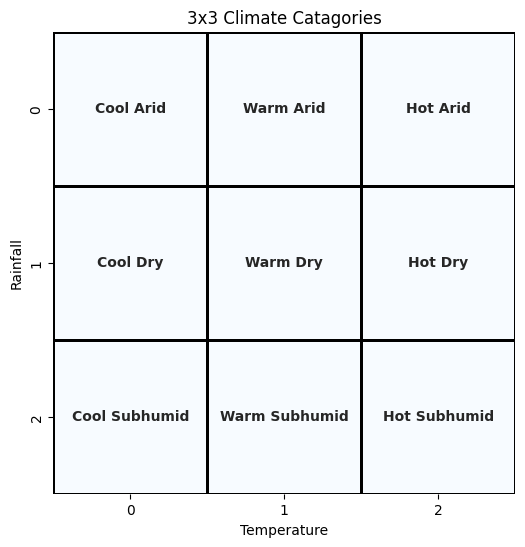

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(np.zeros((3,3)), annot = climate_df, fmt = "", cmap = "Blues",
            cbar = False, linewidths = 1, linecolor = "black",
            annot_kws = {"size": 10, "weight": "bold"}, square = True)
plt.title("3x3 Climate Catagories")
plt.xlabel("Temperature")
plt.ylabel("Rainfall")
plt.show()

Distribution of Crops by CLimate Catagory

- We have an equal amount of Type of crops in each climate but the wetter the climate the larger the sample size

C:\Users\issab\AppData\Local\Temp\ipykernel_21696\2520974475.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crop_counts = df.groupby(["Climate", "Crop"]).size().unstack(fill_value = 0)


<Figure size 1200x800 with 0 Axes>

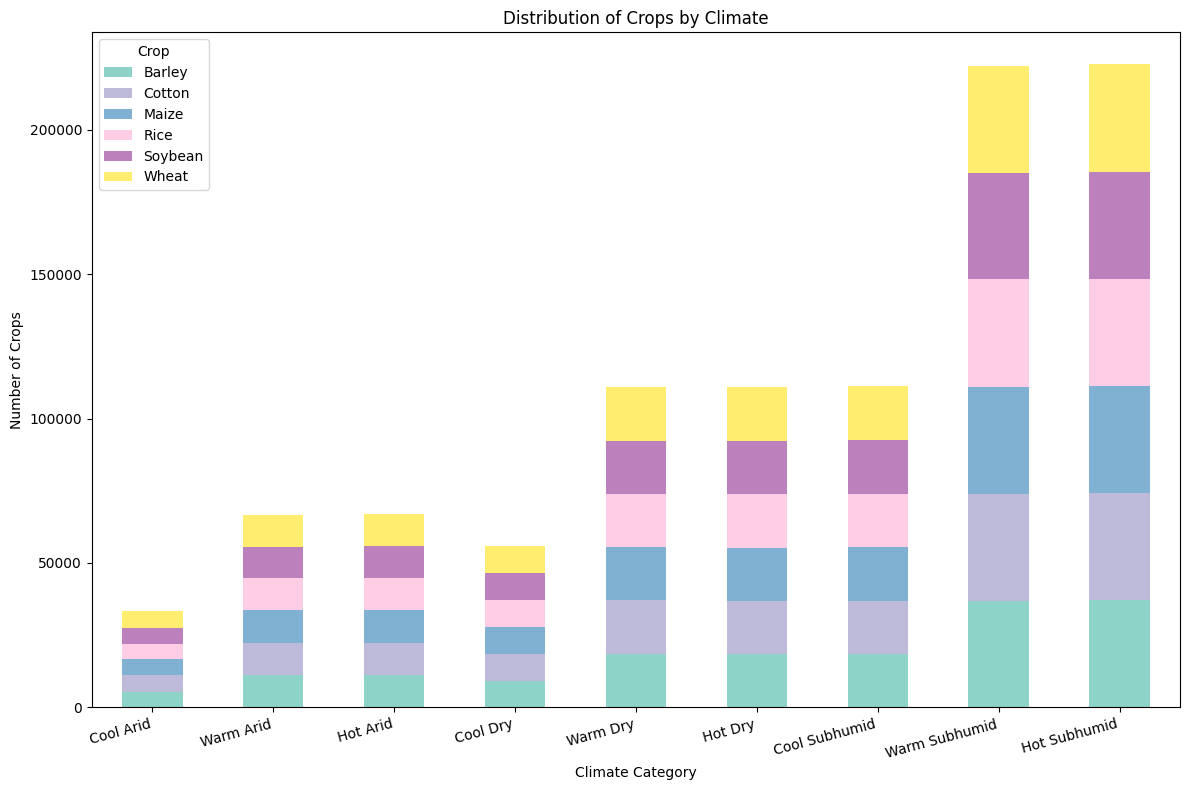

In [ ]:
crop_counts = df.groupby(["Climate", "Crop"]).size().unstack(fill_value = 0)
plt.figure(figsize=(12,8))
crop_counts.plot(kind = "bar", stacked = True, figsize=(12, 8), colormap="Set3")
plt.title("Distribution of Crops by Climate")
plt.xlabel("Climate Category")
plt.ylabel("Number of Crops")

plt.xticks(rotation = 15, ha = "right")
plt.tight_layout()
plt.show()

Yield Variation by Climate:

- The wetter the climate the higher the crop yield

- and minorly the hotter the climate the higher the crop yield

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Cool Arid'),
  Text(1, 0, 'Warm Arid'),
  Text(2, 0, 'Hot Arid'),
  Text(3, 0, 'Cool Dry'),
  Text(4, 0, 'Warm Dry'),
  Text(5, 0, 'Hot Dry'),
  Text(6, 0, 'Cool Subhumid'),
  Text(7, 0, 'Warm Subhumid'),
  Text(8, 0, 'Hot Subhumid')])

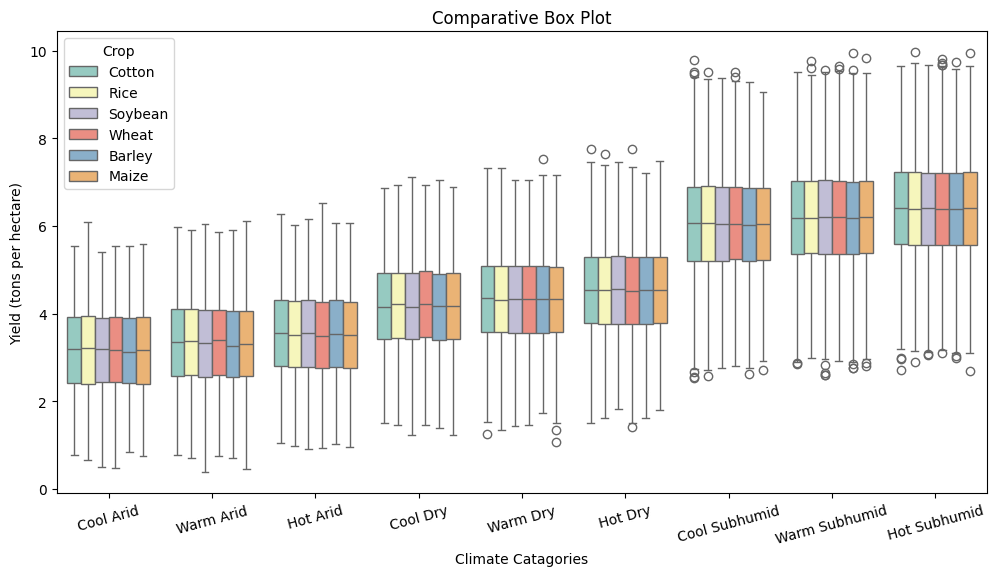

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df[df["Irrigation_Used"] == True], x = "Climate", y = "Yield_tons_per_hectare", hue = "Crop", palette = "Set3")
plt.title("Comparative Box Plot")
plt.xlabel("Climate Catagories")
plt.ylabel("Yield (tons per hectare)")
plt.xticks(rotation = 15)

Kruskal Wallis H Test For Independent Samples:
- non-normal data
    - Shapiro Wilks test
- purpose:
    - To determine if yield differences across climates are statisticaly significant
- Results:
    - p-val = 0
- Interpretation:
    - Climate affects crop yield
    - Mostly Rainfall, although tmperature is statistically significant as well

In [ ]:
print(stats.shapiro(df["Yield_tons_per_hectare"]))

def krusty(df, type = "Climate"):
    if(type == "Climate"):
        Krusty_result = stats.kruskal(df[df["Climate"] == "Cool Arid"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Cool Dry"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Cool Subhumid"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Warm Arid"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Warm Dry"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Warm Subhumid"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Hot Arid"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Hot Dry"]["Yield_tons_per_hectare"],
                                df[df["Climate"] == "Hot Subhumid"]["Yield_tons_per_hectare"])
    elif(type == "Rain"):
        Krusty_result = stats.kruskal(df[df["Rain_Catagory"] == "Arid"]["Yield_tons_per_hectare"],
                                      df[df["Rain_Catagory"] == "Dry"]["Yield_tons_per_hectare"],
                                      df[df["Rain_Catagory"] == "Subhumid"]["Yield_tons_per_hectare"])
    else:
        Krusty_result = stats.kruskal(df[df["Temperature_Catagory"] == "Cool"]["Yield_tons_per_hectare"],
                                      df[df["Temperature_Catagory"] == "Warm"]["Yield_tons_per_hectare"],
                                      df[df["Temperature_Catagory"] == "Hot"]["Yield_tons_per_hectare"])

    print(Krusty_result)
krusty(df, "Climate")
krusty(df, "Rain")
krusty(df, "Temp")

c:\Users\issab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1000000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9956771606389817), pvalue=np.float64(7.073913345076585e-69))
KruskalResult(statistic=np.float64(488422.48959508725), pvalue=np.float64(0.0))
KruskalResult(statistic=np.float64(482747.0122608538), pvalue=np.float64(0.0))
KruskalResult(statistic=np.float64(5629.180232490413), pvalue=np.float64(0.0))


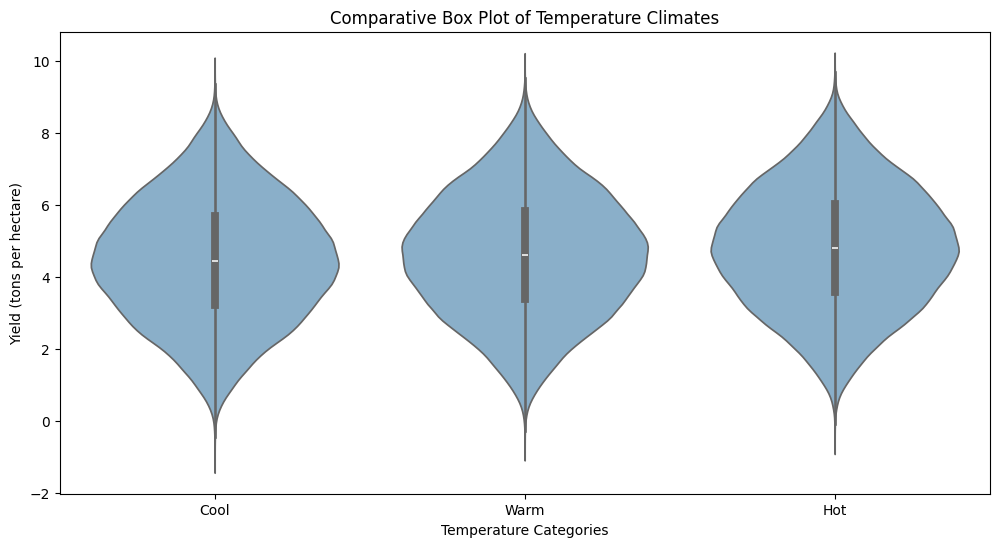

In [ ]:
plt.figure(figsize = (12,6))
sns.violinplot(data = df, x = "Temperature_Catagory", y = "Yield_tons_per_hectare", color = sns.color_palette("Set3")[4])
plt.title("Comparative Box Plot of Temperature Climates")
plt.xlabel("Temperature Categories")
plt.ylabel("Yield (tons per hectare)")
plt.show()

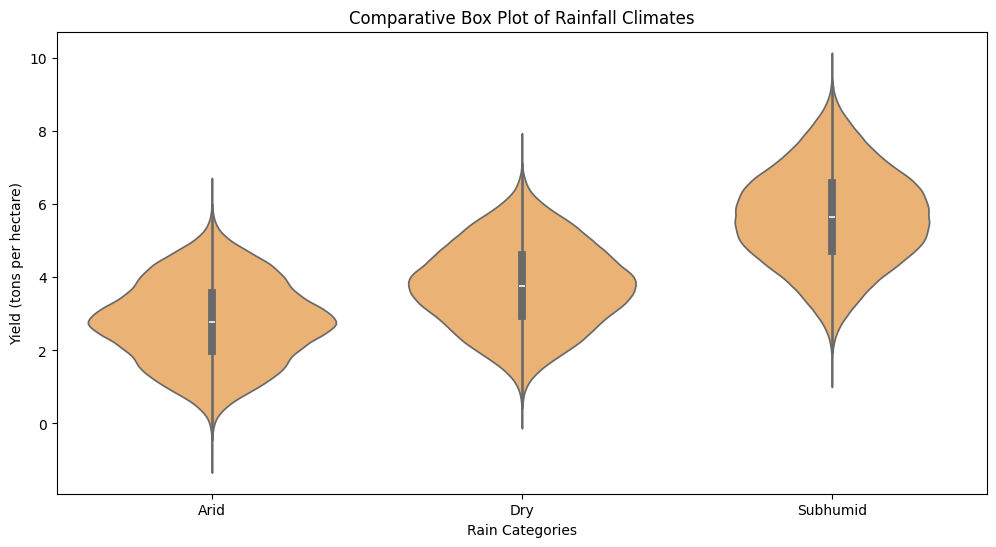

In [ ]:
plt.figure(figsize = (12,6))
sns.violinplot(data = df, x = "Rain_Catagory", y = "Yield_tons_per_hectare", color = sns.color_palette("Set3")[5])
plt.title("Comparative Box Plot of Rainfall Climates")
plt.xlabel("Rain Categories")
plt.ylabel("Yield (tons per hectare)")
plt.show()

Additional Info:
    - Effect of Irrigation
    - Effect of Fertalizer used

In [ ]:
for j in climate_lables:
    for i in j:
        # Filter the DataFrame
        group1 = df[(df["Climate"] == i) & (df["Irrigation_Used"] == True)]["Yield_tons_per_hectare"]
        group2 = df[(df["Climate"] == i) & (df["Irrigation_Used"] == False)]["Yield_tons_per_hectare"]
        if len(group1) > 0 and len(group2) > 0:
            result = stats.mannwhitneyu(group1, group2, alternative = "greater")
            print(f"{i}: {result}")
        else:
            print(f"{i}: One of the groups has no data points")

print("-----------------------------------------------------------------------------")
print(".............................................................................")
for j in climate_lables:
    for i in j:
        # Filter the DataFrame
        group1 = df[(df["Climate"] == i) & (df["Fertilizer_Used"] == True)]["Yield_tons_per_hectare"]
        group2 = df[(df["Climate"] == i) & (df["Fertilizer_Used"] == False)]["Yield_tons_per_hectare"]
        if len(group1) > 0 and len(group2) > 0:
            result = stats.mannwhitneyu(group1, group2, alternative = "greater")
            print(f"{i}: {result}")
        else:
            print(f"{i}: One of the groups has no data points")


Cool Arid: MannwhitneyuResult(statistic=np.float64(223140924.0), pvalue=np.float64(0.0))
Warm Arid: MannwhitneyuResult(statistic=np.float64(897310335.0), pvalue=np.float64(0.0))
Hot Arid: MannwhitneyuResult(statistic=np.float64(903624415.0), pvalue=np.float64(0.0))
Cool Dry: MannwhitneyuResult(statistic=np.float64(621063087.0), pvalue=np.float64(0.0))
Warm Dry: MannwhitneyuResult(statistic=np.float64(2460485252.0), pvalue=np.float64(0.0))
Hot Dry: MannwhitneyuResult(statistic=np.float64(2455060038.0), pvalue=np.float64(0.0))
Cool Subhumid: MannwhitneyuResult(statistic=np.float64(2347765871.0), pvalue=np.float64(0.0))
Warm Subhumid: MannwhitneyuResult(statistic=np.float64(9378631434.0), pvalue=np.float64(0.0))
Hot Subhumid: MannwhitneyuResult(statistic=np.float64(9426558905.0), pvalue=np.float64(0.0))
-----------------------------------------------------------------------------
.............................................................................
Cool Arid: MannwhitneyuResult(st

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Cool Arid'),
  Text(1, 0, 'Warm Arid'),
  Text(2, 0, 'Hot Arid'),
  Text(3, 0, 'Cool Dry'),
  Text(4, 0, 'Warm Dry'),
  Text(5, 0, 'Hot Dry'),
  Text(6, 0, 'Cool Subhumid'),
  Text(7, 0, 'Warm Subhumid'),
  Text(8, 0, 'Hot Subhumid')])

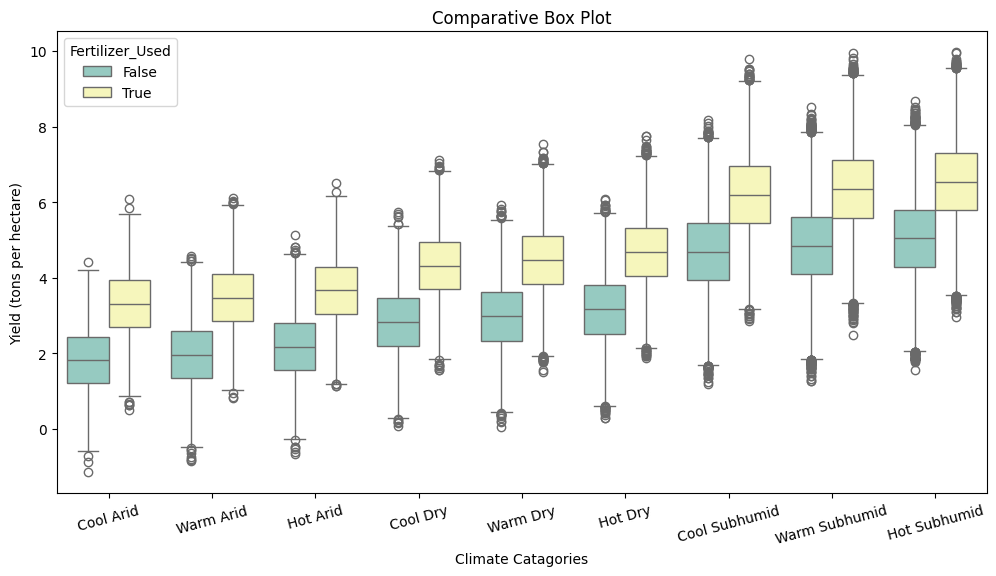

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = "Climate", y = "Yield_tons_per_hectare", hue = "Fertilizer_Used", palette = "Set3")
plt.title("Comparative Box Plot")
plt.xlabel("Climate Catagories")
plt.ylabel("Yield (tons per hectare)")
plt.xticks(rotation = 15)

C:\Users\issab\AppData\Local\Temp\ipykernel_21696\145999908.py:5: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(data = df, x = "Climate", y = "Yield_tons_per_hectare", hue = "Irrigation_Used", palette = shifted_palette)


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Cool Arid'),
  Text(1, 0, 'Warm Arid'),
  Text(2, 0, 'Hot Arid'),
  Text(3, 0, 'Cool Dry'),
  Text(4, 0, 'Warm Dry'),
  Text(5, 0, 'Hot Dry'),
  Text(6, 0, 'Cool Subhumid'),
  Text(7, 0, 'Warm Subhumid'),
  Text(8, 0, 'Hot Subhumid')])

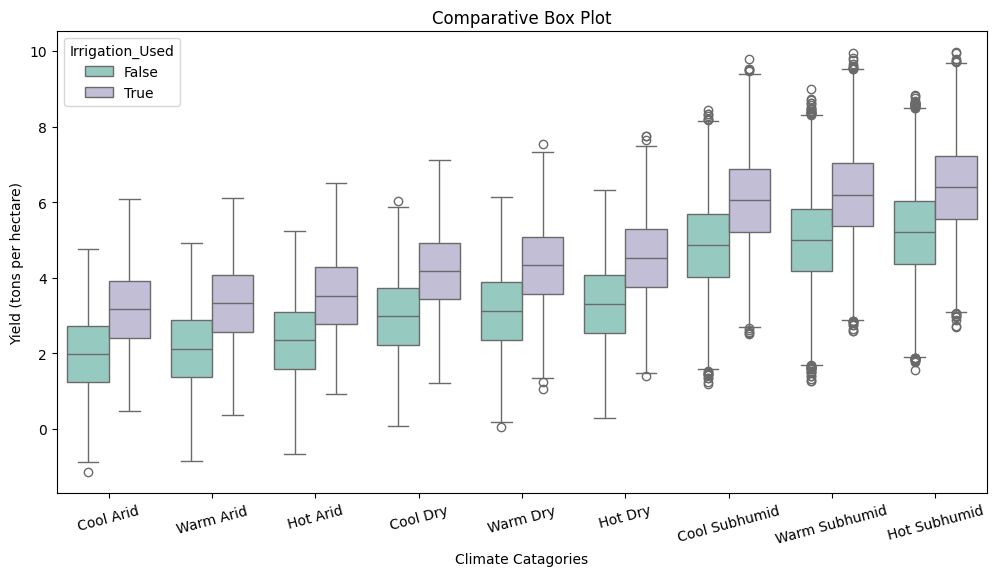

In [ ]:
palette = sns.color_palette("Set3")
shifted_palette = palette[::2] + palette[1::2]

plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = "Climate", y = "Yield_tons_per_hectare", hue = "Irrigation_Used", palette = shifted_palette)
plt.title("Comparative Box Plot")
plt.xlabel("Climate Catagories")
plt.ylabel("Yield (tons per hectare)")
plt.xticks(rotation = 15)

Conclusion:

- Summarize findings
    - mention if any of this can be used by local farmers or agricultural plicy makers

- Implications for Agriculture
    - how results can influence farming practices
    - reiterate why results are important